In [2]:
# Custom libraries
from datascienceutils import plotter
from datascienceutils import analyze

# Standard libraries
import json
%matplotlib inline
import datetime
import numpy as np
import pandas as pd
import random


from bokeh.plotting import figure, show, output_file, output_notebook, ColumnDataSource
from bokeh.charts import Histogram
import bokeh
output_notebook()


Loading BokehJS ...

In [3]:
irisDf = pd.read_csv('/home/anand/DataScientist/data/Iris.csv')
# Sample Timeseries  picked from here https://www.backblaze.com/b2/hard-drive-test-data.html
hdd2013Df = pd.read_csv('/home/anand/DataScientist/data/hdd_2013/2013-11-26.csv')

In [7]:
# Create classes for showing off correlation_analyze's heatmapping ability
def createClasses(x):
    rdm = random.random()
    if rdm < 0.3:
        return 'A'
    elif rdm > 0.3 and rdm < 0.6:
        return 'B' 
    else:
        return 'C'
irisDf['Class'] = [np.nan]*len(irisDf)
irisDf['Class'] = irisDf['Class'].apply(createClasses)

In [8]:
irisDf.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
irisDf.head()

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species  \
0   1            5.1           3.5            1.4           0.2  Iris-setosa   
1   2            4.9           3.0            1.4           0.2  Iris-setosa   
2   3            4.7           3.2            1.3           0.2  Iris-setosa   
3   4            4.6           3.1            1.5           0.2  Iris-setosa   
4   5            5.0           3.6            1.4           0.2  Iris-setosa   

  Class  
0     B  
1     C  
2     B  
3     C  
4     B

In [7]:
irisDf.var()

Id               1887.500000
SepalLengthCm       0.685694
SepalWidthCm        0.188004
PetalLengthCm       3.113179
PetalWidthCm        0.582414
dtype: float64

In [8]:
irisDf.skew()

Id               0.000000
SepalLengthCm    0.314911
SepalWidthCm     0.334053
PetalLengthCm   -0.274464
PetalWidthCm    -0.104997
dtype: float64

In [9]:
irisDf.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


In [10]:
numericalCols = irisDf.select_dtypes(include=[np.number]).columns

# Correlation btw Numerical Columns


/home/anand/anaconda3/envs/analytics/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/home/anand/anaconda3/envs/analytics/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


# Correlation btw Columns Species & Class by measure PetalLengthCm


ImportError: cannot import name 'HeatMap'

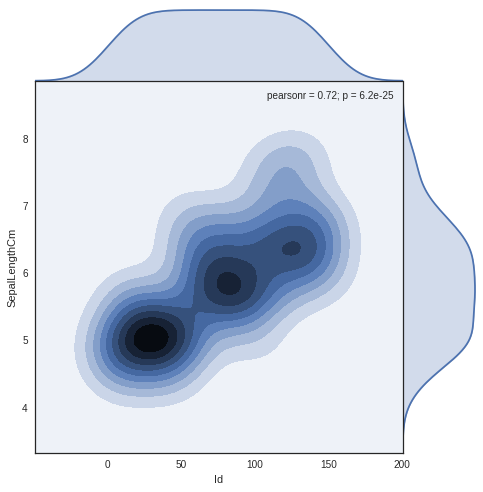

In [11]:
import itertools
for combo in itertools.combinations(numericalCols, 2):
    analyze.correlation_analyze(irisDf, combo[0], combo[1],
                                categories=['Species', 'Class'], 
                                measures=['PetalLengthCm', 'PetalWidthCm'])

Variance of PetalLengthCm
3.11317941834
Skewness of PetalLengthCm
-0.274464252474
Kolmogrov - Smirnov test with distribution norm
KstestResult(statistic=0.87653284874772308, pvalue=0.0)
Anderson-Darling normality test on PetalLengthCm 
Statistic: 7.672883 
 p-value: 0.000000



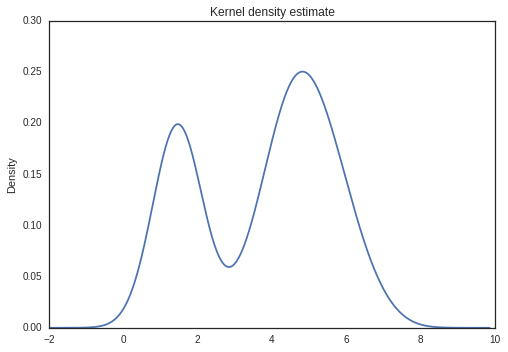

In [12]:
plotter.show(analyze.dist_analyze(irisDf, 'PetalLengthCm'))

Variance of SepalLengthCm
0.685693512304
Skewness of SepalLengthCm
0.314910956637
Kolmogrov - Smirnov test with distribution norm
KstestResult(statistic=0.99999146009452899, pvalue=0.0)
Anderson-Darling normality test on SepalLengthCm 
Statistic: 0.889199 
 p-value: 0.022511



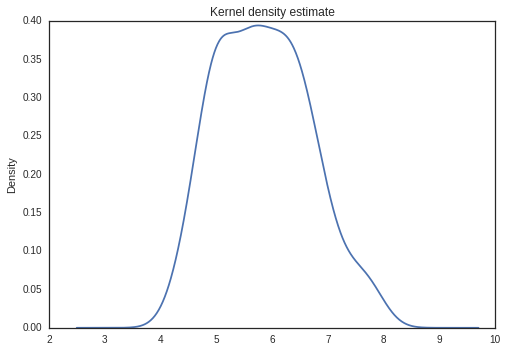

In [ ]:
plotter.show(analyze.dist_analyze(irisDf, 'SepalLengthCm'))

Variance of PetalLengthCm
3.11317941834
Skewness of PetalLengthCm
-0.274464252474
Kolmogrov - Smirnov test with distribution norm
KstestResult(statistic=0.87653284874772308, pvalue=0.0)
Anderson-Darling normality test on PetalLengthCm 
Statistic: 7.672883 
 p-value: 0.000000



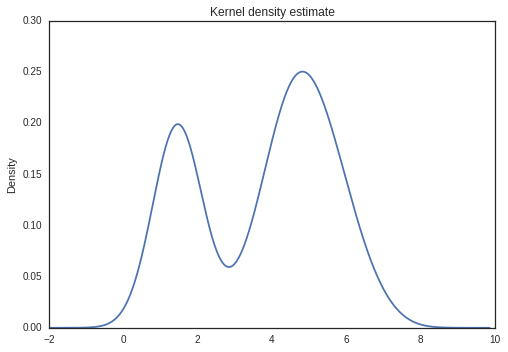

In [ ]:
plotter.show(analyze.dist_analyze(irisDf, 'PetalLengthCm'))

In [18]:
analyze.regression_analyze(irisDf, 'SepalLengthCm', 'SepalWidthCm', check_vif=False, check_heteroskedasticity=False)

P-value and test statistic for distribution similarity between SepalLengthCm and SepalWidthCm
(0.0, 2.7893333333333334)
Regression Score: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
0.0119616328348
Regression Score: Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)
0.0119605090125
Regression Score: RidgeCV(alphas=(0.1, 1.0, 10.0), cv=None, fit_intercept=True, gcv_mode=None,
    normalize=False, scoring=None, store_cv_values=False)
0.011866561425
Regression Score: Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
0.0
Regression Score: ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_sta

/home/anand/anaconda3/envs/analytics/lib/python3.5/site-packages/datascienceutils-1.2.19-py3.5.egg/datascienceutils/predictiveModels.py:31: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


In [19]:
irisDf.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Class
0,1,5.1,3.5,1.4,0.2,Iris-setosa,B
1,2,4.9,3.0,1.4,0.2,Iris-setosa,C
2,3,4.7,3.2,1.3,0.2,Iris-setosa,B
3,4,4.6,3.1,1.5,0.2,Iris-setosa,C
4,5,5.0,3.6,1.4,0.2,Iris-setosa,B


In [20]:
irisDf.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Class
145,146,6.7,3.0,5.2,2.3,Iris-virginica,C
146,147,6.3,2.5,5.0,1.9,Iris-virginica,A
147,148,6.5,3.0,5.2,2.0,Iris-virginica,A
148,149,6.2,3.4,5.4,2.3,Iris-virginica,B
149,150,5.9,3.0,5.1,1.8,Iris-virginica,A


In [21]:
plotter.show(analyze.fractal_analyze(irisDf, 'SepalLengthCm'))

AttributeError: 'NoneType' object has no attribute 'references'

In [22]:
print(analyze.fractal_dimension(irisDf[['SepalLengthCm', 'PetalLengthCm']].as_matrix()))

TypeError: expected non-empty vector for x

In [23]:
hdd2013Df.fillna(value=0, inplace=True)
hdd2013Df.describe()

,capacity_bytes,failure,smart_1_normalized,smart_1_raw,smart_2_normalized,smart_2_raw,smart_3_normalized,smart_3_raw,smart_4_normalized,smart_4_raw,...,smart_250_normalized,smart_250_raw,smart_251_normalized,smart_251_raw,smart_252_normalized,smart_252_raw,smart_254_normalized,smart_254_raw,smart_255_normalized,smart_255_raw
count,2.655000e+04,26550.000000,26550.0,2.655000e+04,26550.0,26550.0,26550.0,26550.0,26550.0,26550.0,...,26550.0,26550.0,26550.0,26550.0,26550.0,26550.0,26550.0,26550.0,26550.0,26550.0
mean,2.895978e+12,0.000151,0.0,5.556346e+07,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,8.723011e+11,0.012274,0.0,7.741375e+07,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,1.000205e+12,0.000000,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,2.000399e+12,0.000000,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,3.000593e+12,0.000000,0.0,1.025500e+03,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,4.000787e+12,0.000000,0.0,1.092058e+08,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,4.000787e+12,1.000000,0.0,1.041384e+09,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
hdd2013Df.head()

,date,serial_number,model,capacity_bytes,failure,smart_1_normalized,smart_1_raw,smart_2_normalized,smart_2_raw,smart_3_normalized,...,smart_250_normalized,smart_250_raw,smart_251_normalized,smart_251_raw,smart_252_normalized,smart_252_raw,smart_254_normalized,smart_254_raw,smart_255_normalized,smart_255_raw
0,2013-11-26,MJ0351YNG9Z0XA,Hitachi HDS5C3030ALA630,3000592982016,0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2013-11-26,MJ0351YNG9Z7LA,Hitachi HDS5C3030ALA630,3000592982016,0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2013-11-26,MJ0351YNGABYAA,Hitachi HDS5C3030ALA630,3000592982016,0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2013-11-26,PL1321LAG34XWH,Hitachi HDS5C4040ALE630,4000787030016,0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2013-11-26,PL1311LAG2205A,Hitachi HDS5C4040ALE630,4000787030016,0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
hdd2013Df['date'] = hdd2013Df['date'].astype('datetime64[ns]')

In [26]:
hdd2013Df['date'] = [each + datetime.timedelta(0, i*45) for i, each in enumerate(hdd2013Df.date)]

In [27]:
analyze.time_series_analysis(hdd2013Df, timeCol='date', valueCol='smart_1_raw', seasonal={'freq': '30s'})

/home/anand/anaconda3/envs/analytics/lib/python3.5/site-packages/datascienceutils-1.2.19-py3.5.egg/datascienceutils/timeSeriesUtils.py:81: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
/home/anand/anaconda3/envs/analytics/lib/python3.5/site-packages/datascienceutils-1.2.19-py3.5.egg/datascienceutils/timeSeriesUtils.py:10: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(center=False,window=12).mean()
/home/anand/anaconda3/envs/analytics/lib/python3.5/site-packages/datascienceutils-1.2.19-py3.5.egg/datascienceutils/timeSeriesUtils.py:11: FutureWarning: pd.rolling_std is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(center=False,window=12).std()


TypeError: first argument must be an iterable of pandas objects, you passed an object of type "DataFrame"